<a href="https://colab.research.google.com/github/mariabandeira/EDO/blob/main/Pratica1_EDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade Prática 1

Aluna: Maria Eduarda Bandeira Hora

Matrícula: 2022000723

Disciplina: Equações Diferenciais Ordinárias

## 1) Método de Euler implícito para um PVI com uma EDO;

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def f(x, y):
  return x - 2*y + 1

In [ ]:
def euler(a, b, m, y0):
  h = (b - a)/m
  x = a
  y = y0
  VetX = [x]
  VetY = [y]
  Fxy = f(x,y)
  print("i \t x \t y \t Fxy")
  print(f"{0:.3f} \t {x:.3f} \t {y:.3f} \t {Fxy:.3f}")
  for i in range(1, m+1):
    x = a + i*h
    y = y + h*Fxy
    Fxy = f(x,y)
    print(f"{i:.3f} \t {x:.3f} \t {y:.3f} \t {Fxy:.3f}")
    VetX.append(x)
    VetY.append(y)
  return VetX, VetY

In [ ]:
VetX, VetY = euler(0, 1, 10, 1)

i 	 x 	 y 	 Fxy
0.000 	 0.000 	 1.000 	 -1.000
1.000 	 0.100 	 0.900 	 -0.700
2.000 	 0.200 	 0.830 	 -0.460
3.000 	 0.300 	 0.784 	 -0.268
4.000 	 0.400 	 0.757 	 -0.114
5.000 	 0.500 	 0.746 	 0.008
6.000 	 0.600 	 0.747 	 0.107
7.000 	 0.700 	 0.757 	 0.185
8.000 	 0.800 	 0.776 	 0.248
9.000 	 0.900 	 0.801 	 0.299
10.000 	 1.000 	 0.831 	 0.339


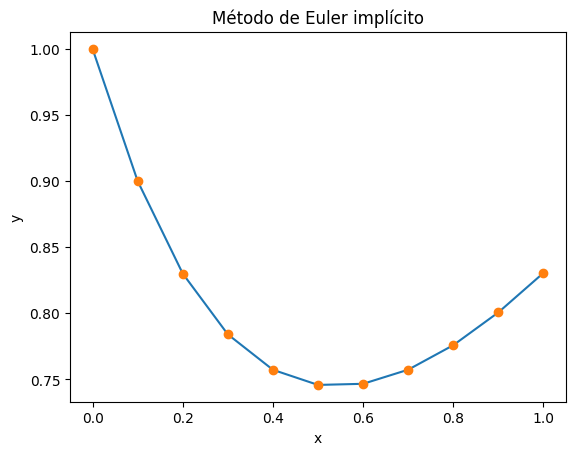

In [ ]:
plt.plot(VetX[0:], VetY[0:])
plt.plot(VetX[0:], VetY[0:], 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Método de Euler implícito')
plt.show()

## 2) Método de Euler implícito para um PVI com um sistema de duas EDO’s;

In [ ]:
def f1(x, y1, y2):
  return 2*x*y1 + y2

def f2(x, y1, y2):
  return -y2 + y1*y2

In [ ]:
def euler2(a, b, m, y10, y20):
  h = (b - a)/m
  x = a
  y1 = y10
  y2 = y20

  VetX = [x]
  VetY1 = [y1]
  VetY2 = [y2]

  F1 = f1(x,y1, y2)
  F2 = f2(x,y1, y2)

  print("i \t x \t y1 \t y2 \t f1 \t f2")
  print(f"{0:.2f} \t {x:.2f} \t {y1:.2f} \t {y2:.2f} \t {F1:.2f} \t {F2:.2f}")

  for i in range(1, m+1):
    x = a + i*h
    y1 = y1 + h*F1
    y2 = y2 + h*F2
    F1 = f1(x,y1,y2)
    F2 = f2(x,y1,y2)
    print(f"{i:.2f} \t {x:.2f} \t {y1:.2f} \t {y2:.2f} \t {F1:.2f} \t {F2:.2f}")
    VetX.append(x)
    VetY1.append(y1)
    VetY2.append(y2)
  return VetX, VetY1, VetY2

In [ ]:
VetX, VetY1, VetY2 = euler2(1, 2, 4, 2, 1)

i 	 x 	 y1 	 y2 	 f1 	 f2
0.00 	 1.00 	 2.00 	 1.00 	 5.00 	 1.00
1.00 	 1.25 	 3.25 	 1.25 	 9.38 	 2.81
2.00 	 1.50 	 5.59 	 1.95 	 18.73 	 8.97
3.00 	 1.75 	 10.28 	 4.20 	 40.17 	 38.93
4.00 	 2.00 	 20.32 	 13.93 	 95.20 	 269.09


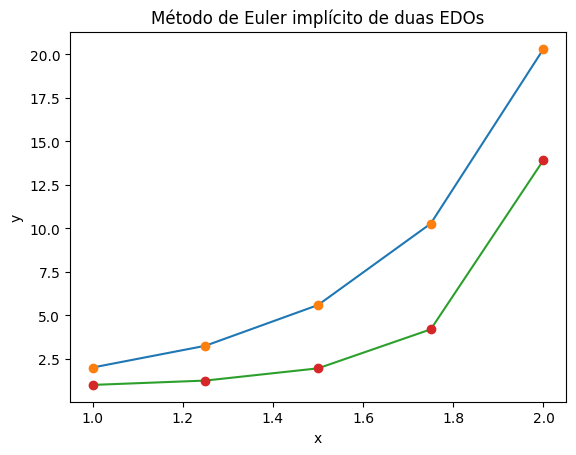

In [ ]:
plt.plot(VetX[0:], VetY1[0:])
plt.plot(VetX[0:], VetY1[0:], 'o')
plt.plot(VetX[0:], VetY2[0:])
plt.plot(VetX[0:], VetY2[0:], 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Método de Euler implícito de duas EDOs')
plt.show()

## 3) Método de Runge-Kutta de quarta ordem para um PVI com uma EDO;

In [ ]:
def runge_kutta(a, b, m, y0):
  h = (b - a)/m
  xt = a
  yt = y0

  VetX = [xt]
  VetY = [yt]
  k1_list, k2_list, k3_list, k4_list = [], [], [], []

  print("i \t x \t y \t k1 \t k2 \t k3 \t k4")
  print(f"{0:.2f} \t {xt:.2f} \t {yt:.2f}")
  for i in range(1, m+1):
    x = xt
    y = yt
    k1 = f(x, y)
    x = xt + h/2
    y = yt + (h/2)*k1
    k2 = f(x, y)
    y = yt + (h/2)*k2
    k3 = f(x, y)
    x = xt + h
    y = yt + h*k3
    k4 = f(x, y)
    xt = a + i*h
    yt = yt + (h/6)*(k1 + 2*(k2 + k3) + k4)

    # Armazenar os valores de k
    k1_list.append(k1)
    k2_list.append(k2)
    k3_list.append(k3)
    k4_list.append(k4)

    print(f"{i:.2f} \t {xt:.2f} \t {yt:.2f}")
    VetX.append(xt)
    VetY.append(yt)

  print("\nTabelas dos valores de k:")
  print("i \t k1 \t k2 \t k3 \t k4")
  for i in range(m):
    k1 = k1_list[i]
    k2 = k2_list[i]
    k3 = k3_list[i]
    k4 = k4_list[i]
    print(f"{i:.2f} \t {k1:.2f} \t {k2:.2f} \t {k3:.2f} \t {k4:.2f}")

  return VetX, VetY

In [ ]:
def f(x, y):
  return x - 2*y + 1

In [ ]:
VetX, VetY = runge_kutta(0, 1, 10, 1)

i 	 x 	 y 	 k1 	 k2 	 k3 	 k4
0.00 	 0.00 	 1.00
1.00 	 0.10 	 0.91
2.00 	 0.20 	 0.85
3.00 	 0.30 	 0.81
4.00 	 0.40 	 0.79
5.00 	 0.50 	 0.78
6.00 	 0.60 	 0.78
7.00 	 0.70 	 0.78
8.00 	 0.80 	 0.80
9.00 	 0.90 	 0.82
10.00 	 1.00 	 0.85

Tabelas dos valores de k:
i 	 k1 	 k2 	 k3 	 k4
0.00 	 -1.00 	 -0.85 	 -0.86 	 -0.73
1.00 	 -0.73 	 -0.61 	 -0.62 	 -0.50
2.00 	 -0.51 	 -0.40 	 -0.41 	 -0.32
3.00 	 -0.32 	 -0.24 	 -0.25 	 -0.17
4.00 	 -0.17 	 -0.11 	 -0.11 	 -0.05
5.00 	 -0.05 	 0.00 	 -0.00 	 0.05
6.00 	 0.05 	 0.09 	 0.09 	 0.13
7.00 	 0.13 	 0.17 	 0.16 	 0.20
8.00 	 0.20 	 0.23 	 0.22 	 0.25
9.00 	 0.25 	 0.28 	 0.27 	 0.30


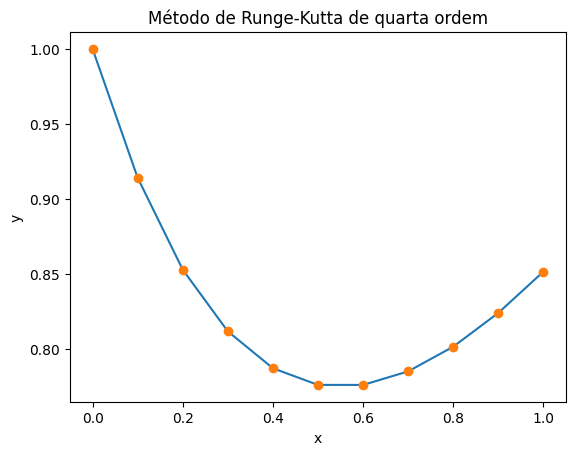

In [ ]:
plt.plot(VetX[0:], VetY[0:])
plt.plot(VetX[0:], VetY[0:], 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Método de Runge-Kutta de quarta ordem')
plt.show()

## 4) Método de Runge-Kutta de quarta ordem para um PVI com um sistema de duas EDO’s;

In [ ]:
def runge_kutta2(a, b, m, y10, y20):
  h = (b - a)/m
  xt = a
  yt1 = y10
  yt2 = y20

  VetX = [xt]
  VetY1 = [yt1]
  VetY2 = [yt2]
  k1, k2, k3, k4 = [], [], [], []

  print("i \t x \t y1 \t y2")
  print(f"{0:.2f} \t {xt:.2f} \t {yt1:.2f} \t {yt2:.2f}")

  for i in range(1, m+1):
    x = xt
    y1 = yt1
    y2 = yt2
    k11 = f1(x, y1, y2)
    k12 = f2(x, y1, y2)
    x = xt + h/2
    y1 = yt1 + (h/2)*k11
    y2 = yt2 + (h/2)*k12
    k21 = f1(x, y1, y2)
    k22 = f2(x, y1, y2)
    y1 = yt1 + (h/2)*k21
    y2 = yt2 + (h/2)*k22
    k31 = f1(x, y1, y2)
    k32 = f2(x, y1, y2)
    x = xt + h
    y1 = yt1 + h*k31
    y2 = yt2 + h*k32
    k41 = f1(x, y1, y2)
    k42 = f2(x, y1, y2)
    xt = a + i*h
    yt1 = yt1 + (h/6)*(k11 + 2*(k21 + k31) + k41)
    yt2 = yt2 + (h/6)*(k12 + 2*(k22 + k32) + k42)
    print(f"{i:.2f} \t {xt:.2f} \t {yt1:.2f} \t {yt2:.2f}")
    VetX.append(xt)
    VetY1.append(yt1)
    VetY2.append(yt2)

    # Armazenar os valores de k
    k1.append((k11, k12))
    k2.append((k21, k22))
    k3.append((k31, k32))
    k4.append((k41, k42))

  # Imprimir tabelas dos valores de k
  print("\nTabelas dos valores de k:")
  print("i \t k11 \t k12 \t k21 \t k22 \t k31 \t k32 \t k41 \t k42")
  for i in range(m):
      k11, k12 = k1[i]
      k21, k22 = k2[i]
      k31, k32 = k3[i]
      k41, k42 = k4[i]
      print(f"{i:.2f} \t {k11:.2f} \t {k12:.2f} \t {k21:.2f} \t {k22:.2f} \t {k31:.2f} \t {k32:.2f} \t {k41:.2f} \t {k42:.2f}")

  return VetX, VetY1, VetY2

In [ ]:
def f1(x, y1, y2):
  return x*y1 + y2

def f2(x, y1, y2):
  return -y1*y2

In [ ]:
VetX, VetY1, VetY2 = runge_kutta2(0, 0.6, 3, 1, -1)

i 	 x 	 y1 	 y2
0.00 	 0.00 	 1.00 	 -1.00
1.00 	 0.20 	 0.84 	 -0.83
2.00 	 0.40 	 0.73 	 -0.71
3.00 	 0.60 	 0.66 	 -0.62

Tabelas dos valores de k:
i 	 k11 	 k12 	 k21 	 k22 	 k31 	 k32 	 k41 	 k42
0.00 	 -1.00 	 1.00 	 -0.81 	 0.81 	 -0.83 	 0.84 	 -0.66 	 0.69
1.00 	 -0.67 	 0.70 	 -0.53 	 0.59 	 -0.54 	 0.61 	 -0.42 	 0.52
2.00 	 -0.42 	 0.52 	 -0.32 	 0.45 	 -0.32 	 0.46 	 -0.22 	 0.41


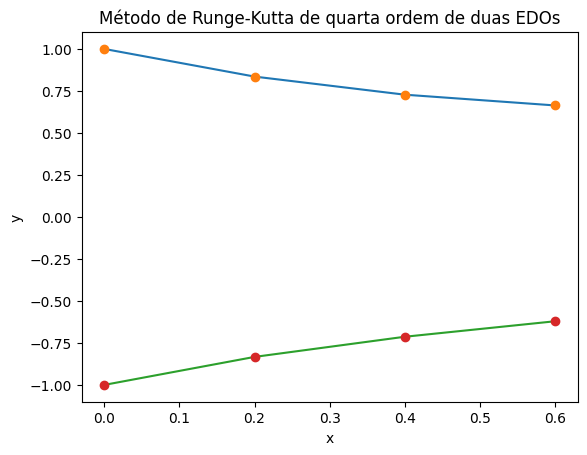

In [ ]:
plt.plot(VetX[0:], VetY1[0:])
plt.plot(VetX[0:], VetY1[0:], 'o')
plt.plot(VetX[0:], VetY2[0:])
plt.plot(VetX[0:], VetY2[0:], 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Método de Runge-Kutta de quarta ordem de duas EDOs')
plt.show()